<a href="https://colab.research.google.com/github/iqbal-svg/ai-ml-project/blob/main/practice_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#gpt
import tensorflow as tf
import numpy as np

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Create input data (2 samples, 3 features each)
x = np.array([[1.0, 2.0, 3.0],
              [4.0, 5.0, 6.0]])

# Convert to tensor (optional – TensorFlow does this automatically)
x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)

# Pass input through the model
output = model(x_tensor)

print("Input tensor:\n", x_tensor)
print("Output tensor:\n", output)

Input tensor:
 tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
Output tensor:
 tf.Tensor(
[[0.575482 ]
 [1.2927449]], shape=(2, 1), dtype=float32)


In [ ]:
tensor = tf.constant([1, 2, 3])
print(tensor)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [ ]:
#build simple NN classifier using TF/KERAS
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.getcwd()

'/content'

In [ ]:
df=pd.read_csv('/content/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
#split
x=df.values[:,:-1]
y=df.values[:,-1]

In [ ]:
x[:6,:]

array([[1, 5.1, 3.5, 1.4, 0.2],
       [2, 4.9, 3.0, 1.4, 0.2],
       [3, 4.7, 3.2, 1.3, 0.2],
       [4, 4.6, 3.1, 1.5, 0.2],
       [5, 5.0, 3.6, 1.4, 0.2],
       [6, 5.4, 3.9, 1.7, 0.4]], dtype=object)

In [ ]:
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
y[:10]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [ ]:
x.dtype

dtype('O')

In [ ]:
x=x.astype('float32')

In [ ]:
x.dtype

dtype('float32')

In [ ]:
y.dtype

dtype('O')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
x_train.shape

(120, 5)

In [ ]:
x_test.shape

(30, 5)

In [ ]:
n_features=x_train.shape[1]
n_features

5

In [ ]:
n_classes=len(np.unique(y_train))
n_classes

3

In [ ]:
class mlpmodel(tf.Module):
  def __init__(self):
    self.w1=tf.Variable(tf.random.normal([n_features,10],stddev=0.1),name='w1')
    self.b1=tf.Variable(tf.zeros([10]),name='b1')
    self.w2=tf.Variable(tf.random.normal([10,8],stddev=0.1),name='w2')
    self.b2=tf.Variable(tf.zeros([8]),name='b2')
    self.w3=tf.Variable(tf.random.normal([8,n_classes],stddev=0.1),name='w3')
    self.b3=tf.Variable(tf.zeros([n_classes]),name='b3')

    #forward propogation
  def __call__(self,x):
    layer1=tf.nn.relu(tf.add(tf.matmul(x,self.w1),self.b1))
    layer2=tf.nn.relu(tf.add(tf.matmul(layer1,self.w2),self.b2))
    output=tf.add(tf.matmul(layer2,self.w3),self.b3)
    return output

In [ ]:
model=mlpmodel()
loss_fn=tf.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer=tf.optimizers.Adam(learning_rate=0.001)

In [ ]:
#GPT
import tensorflow as tf

@tf.function
def add(a, b):
    return a + b

x = tf.constant(2)
y = tf.constant(3)
print(add(x, y))


tf.Tensor(5, shape=(), dtype=int32)


In [ ]:
@tf.function
def train_step(x,y):
  with tf.GradientTape() as tape:
    logits=model(x)
    loss=loss_fn(y,logits)

  gradients=tape.gradient(loss,model.trainable_variables)
  optimizer.apply_gradients(zip(gradients,model.trainable_variables))
  return loss



In [ ]:
#training loop
n_epochs=150
batch_size=32
for epoch in range(n_epochs):
  dataset=tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(buffer_size=1000).batch(batch_size)
  for batch_x,batch_y in dataset:
     loss = train_step(batch_x, batch_y) #refer the function train_step above
  if (epoch+1)%10 ==0:  #Print loss every 10 epochs
    print(f'Epoch {epoch + 1}, Loss: {loss.numpy()}')



Epoch 10, Loss: 0.9902331233024597
Epoch 20, Loss: 0.9325361251831055
Epoch 30, Loss: 0.7615968585014343
Epoch 40, Loss: 0.5454869270324707
Epoch 50, Loss: 0.39997878670692444
Epoch 60, Loss: 0.4426024854183197
Epoch 70, Loss: 0.4355977475643158
Epoch 80, Loss: 0.22681285440921783
Epoch 90, Loss: 0.15635043382644653
Epoch 100, Loss: 0.22547566890716553
Epoch 110, Loss: 0.17244677245616913
Epoch 120, Loss: 0.13871030509471893
Epoch 130, Loss: 0.15169912576675415
Epoch 140, Loss: 0.12195408344268799
Epoch 150, Loss: 0.1493610292673111


In [ ]:
def evaluate(x,y):
  logits=model(x)
  predictions=tf.argmax(logits,axis=1)
  accuracy=np.mean(predictions.numpy()==y)
  return accuracy

test_accuracy=evaluate(x_test,y_test)
print(f'Test accuracy %: {test_accuracy*100:.3f}')

Test accuracy %: 90.000


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
logits = model(x_test) # raw outputs of the model
predictions = tf.argmax(logits, axis=1).numpy() #convers logits into predicted classes
cm=confusion_matrix(y_test,predictions)
print(cm)

[[11  0  0]
 [ 0 10  3]
 [ 0  0  6]]


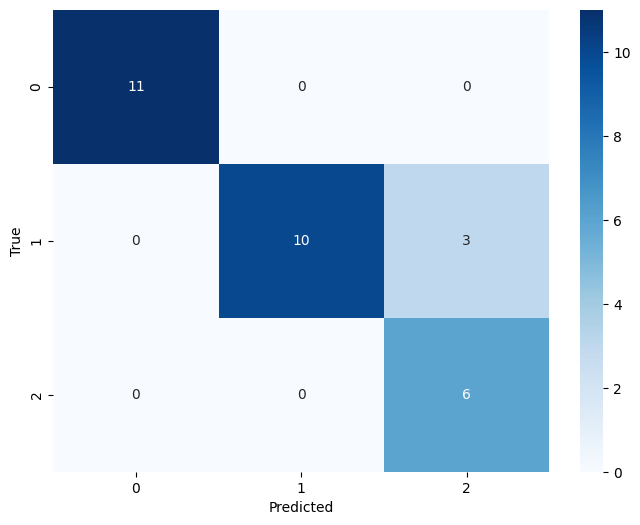

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()